<a href="https://colab.research.google.com/github/willclopes/Portfolio-Data-Science/blob/master/3_EDA_blocos_de_c%C3%B3digo_essenciais_para_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blocos de código essenciais para EDA - Classificação



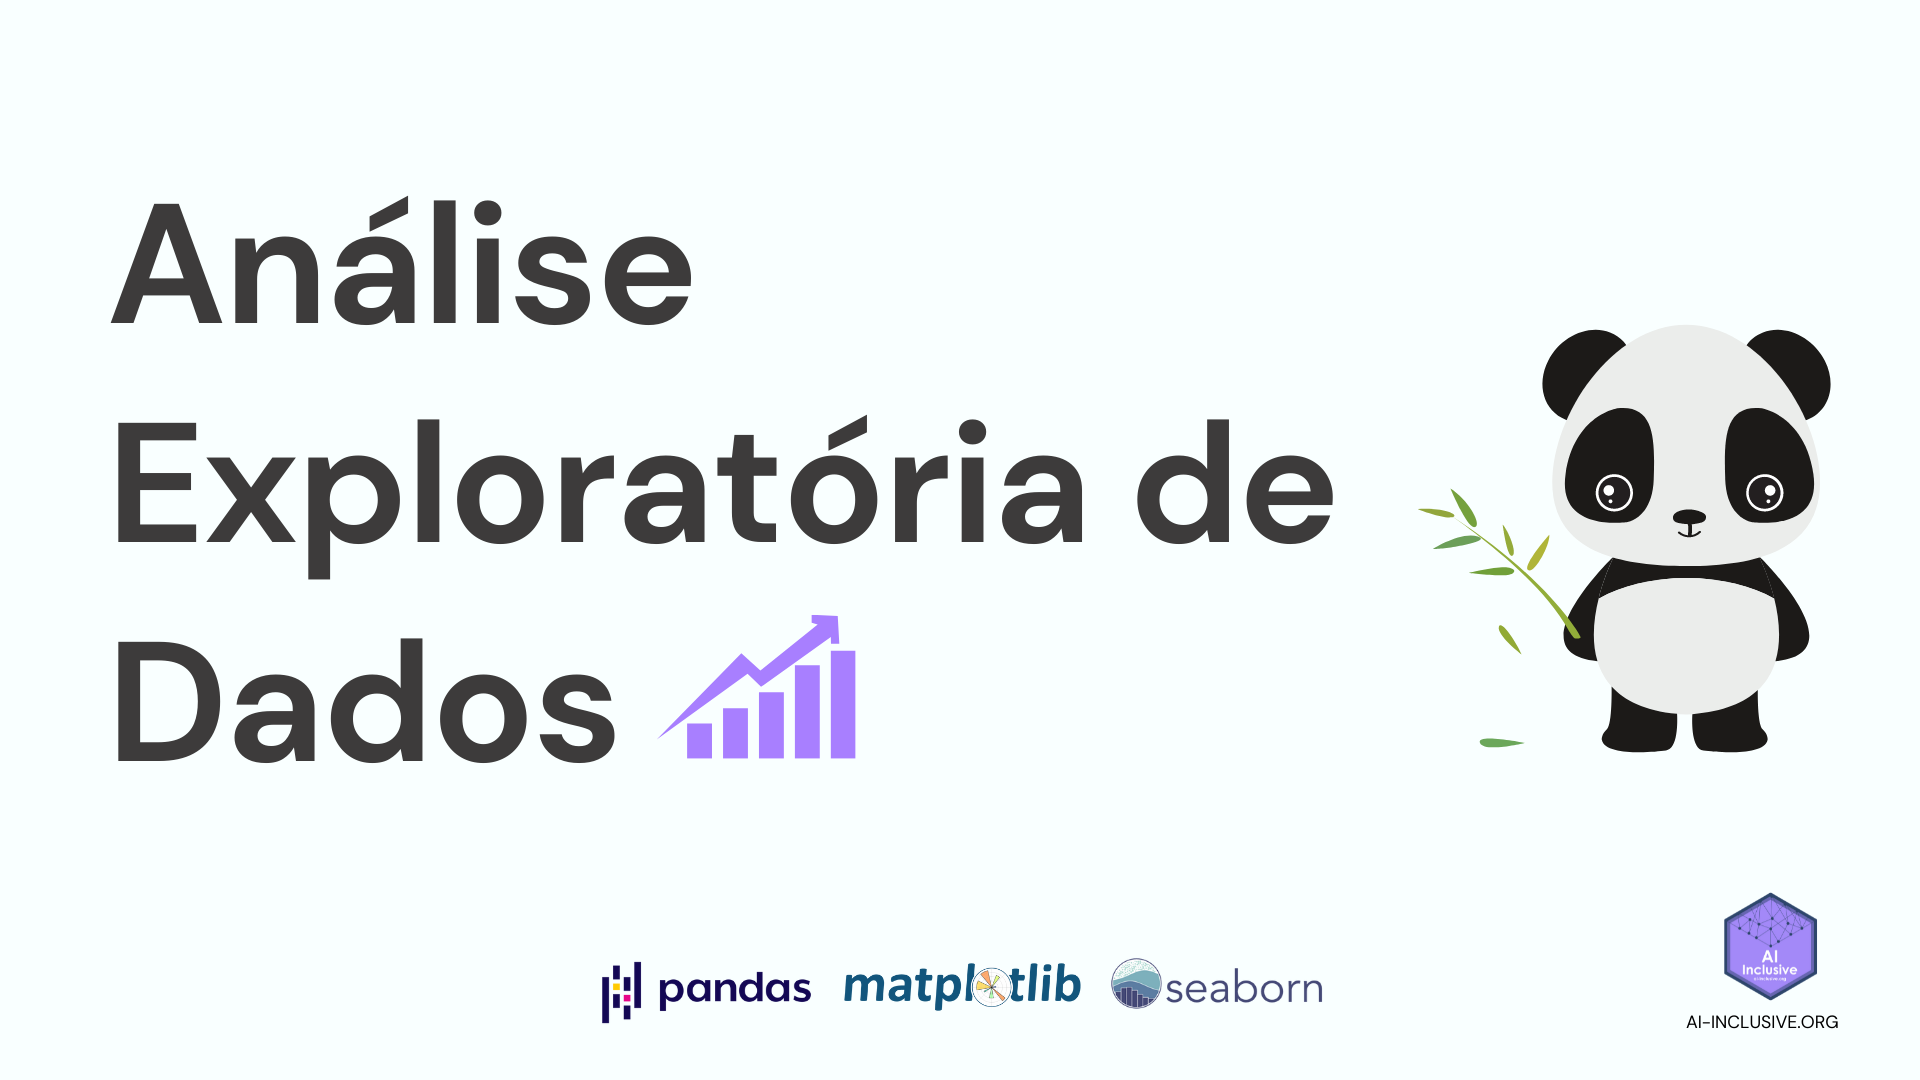

## Contexto

Uma empresa que atua em Big Data e Data Science deseja contratar cientistas de dados entre as pessoas que obtiverem aprovação em alguns cursos ministrados pela empresa. Muitas pessoas se inscrevem para o treinamento. A empresa quer saber quais desses candidatos realmente querem trabalhar para a empresa após o treinamento ou à procura de um novo emprego, pois ajuda a reduzir o custo e o tempo, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos. Informações relacionadas à demografia, educação, experiência estão em mãos desde a inscrição e inscrição dos candidatos.

O conjunto de dados foi desenvolvido para entender os fatores que levam uma pessoa a deixar o emprego atual.

## Introdução

A EDA ou análise exploratória de dados é uma etapa importante do aprendizado de máquina que envolve aprender sobre os dados sem gastar muito tempo ou se perder nisso. Nesse processo você se familiariza com a estrutura e as características gerais do conjunto de dados, com os recursos independentes e dependentes e suas interações. Você também terá uma ideia dos processos de limpeza de dados a serem empregados e das possíveis técnicas de modelagem.

Neste artigo, exploraremos um conjunto de dados da Kaggle para uma empresa que realiza cursos de treinamento para funcionários que querem (ou não) novas oportunidades. A tarefa é prever se os trainees que cursam estão em busca de mudança de emprego e se vão deixar o cargo atual e ingressar na empresa, ou se permanecerão no cargo atual mesmo após a conclusão dos cursos. A tarefa é, portanto, uma tarefa binária, nosso atributo alvo é 0 (não procurando uma mudança de emprego) e 1 (procurando uma mudança de emprego).



Você pode acompanhar baixando o conjunto de dados [aqui](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists).

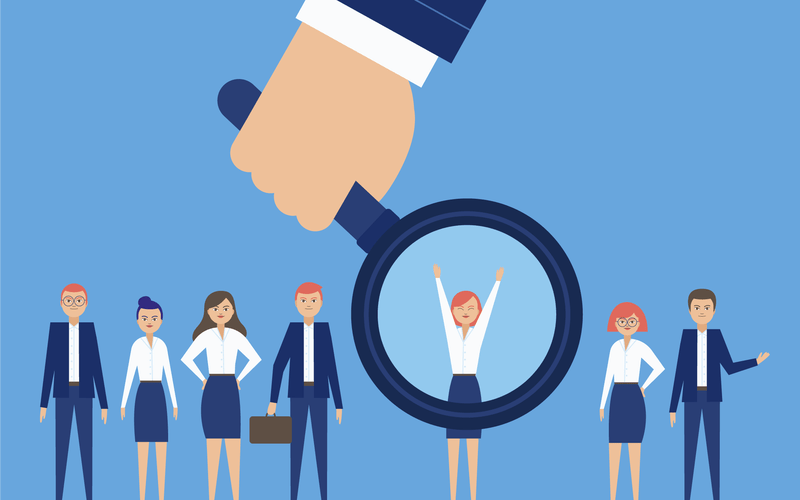

## Importar as Bibliotecas e o DataSet

A primeira etapa é importar as bibliotecas que usaremos em todo o projeto EDA. Em seguida, lemos o **train.csv** que baixei e salvei no meu github. Vamos a EDA no conjunto de **treino** porque ele contém a variável de destino e estamos interessados ​​em compreender os recursos individuais, bem como sua relação com o atributo de destino.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/HR-Analytics-Job-Change-of-Data-Scientists/aug_train.csv')

## Exploração de conjunto de dados básicos

### 1. Forma (dimensões) do DataFrame

Um DataFrame tem linhas e colunas, e o atributo **.shape** do Pandas retorna uma tupla de comprimento 2, cada valor mostrando o comprimento de cada dimensão ou (linhas, colunas). 

Podemos ver que o conjunto de dados possui 19.158 linhas e 14 colunas. Uma dessas colunas no recurso de destino.

### 2. Tipos de dados das várias colunas

Logo após, exibiremos todos os tipos de dados das colunas. Isso nos ajuda a entender o tipo de dados com os quais estamos lidando, em termos de distribuições numéricas e categóricas. Isso também lançará luz sobre alguns dos gráficos e plotagens exploratórias a serem usados.

#### O que procurar;

* Recursos categóricos que devem ser numéricos e vice-versa.

In [ ]:
data.shape

(19158, 14)

In [ ]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

Vemos várias características categóricas (objetos). Também vemos que o nosso atributo algo é um float, representado como 1,0 para aqueles que deixaram o emprego e 0,0 para aqueles que permaneceram após o treinamento. Isso torna **target** um recurso binário.

Nesse ponto, voltamos à página do Kaggle para entender as colunas e seus significados:

---

* enrollee_id: ID exclusivo para o candidato 

* cidade: código da cidade 

* city_ development _index: Índice de desenvolvimento da cidade (em escala)

* gênero: gênero do candidato 

* relevent_experience: Experiência relevante do candidato 

* matriculado_universidade: tipo de curso universitário matriculado, se houver

* nível_de_educação: nível de educação do candidato 

* major_discipline: disciplina principal de educação do candidato

* experiência: Experiência total do candidato em anos 

* tamanho_da_empresa: Nº de funcionários na empresa do empregador atual 

* company_type: tipo de empregador atual 

* lastnewjob: diferença em anos entre o emprego anterior e o emprego atual 

* training_hours: horas de treinamento concluídas 

* target: 0 - Não estou procurando uma mudança de emprego, 1 - Procurando uma mudança de emprego






### 3. Exibir algumas linhas

Agora exibiremos uma pequena seção de nossos dados. Usamos df.head()para exibir as 5 primeiras linhas, df.tail()para exibir as 5 últimas ou df.sample()para escolher 1 linha aleatória do conjunto de dados. df.sample(5)exibe 5 linhas selecionadas aleatoriamente.

#### O que procurar:

* Os nomes das colunas fazem sentido? Você pode verificar as definições da coluna novamente.
* Quais valores estão nas colunas? Eles fazem sentido?
* Você pode ver um número significativo de valores ausentes (NaNs)
* Quais são algumas das classes exclusivas para os recursos categóricos?

In [ ]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


A tabela dá-nos uma ideia dos valores presentes nas diferentes funcionalidades e os nomes das colunas são autoexplicativos. Podemos ver alguns valores ausentes significativos nas colunas como **gender** e **company_size.**

## Distribuições Numéricas

A distribuição de um atributo refere-se à frequência com que os valores desse atributo ocorrem. Para atributo numéricos (contínuos), os valores são agrupados em intervalos, também conhecidos como compartimentos. 

Usaremos **gráficos** para traçar as distribuições e ter uma ideia intuitiva dos valores em cada coluna. Também exibiremos estatísticas de resumo reais que contêm números reais das distribuições. É importante usar gráficos e estatísticas, pois eles se complementam.

### 4. Histograma dos atributos numéricas

Um histograma é uma forma de gráfico de barras que agrupa os números em intervalos e a altura das barras mostra quantos valores estão nesse intervalo. Usaremos a função df.hist() do Pandas para traçar um histograma de cada atributo numérico no conjunto de dados. Também passaremos a função **figsize=(8,8)** e **xrot=45** para aumentar o tamanho da grade e girar o eixo x para facilitar a leitura.

#### O que procurar;

* Potenciais outliers
* Recursos numéricos que devem ser recursos categóricos (indicadores). Por exemplo, se houver apenas dois valores possíveis, como 0 e 1.
* Limites que não fazem sentido, como um valor percentual maior que 100.

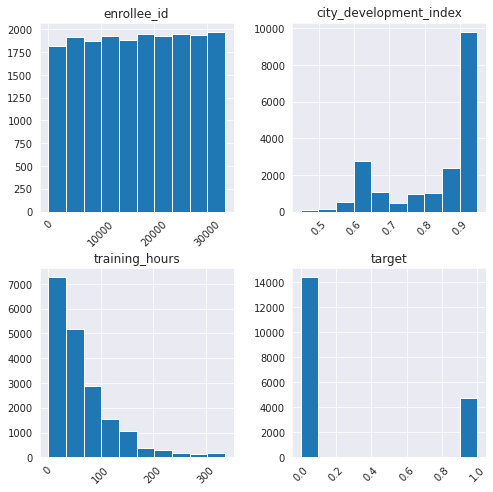

In [ ]:
data.hist(figsize=(8,8), xrot=45)
plt.show()

Como esperado, vemos que **target**, nosso recurso dependente, é na verdade uma variável indicadora com apenas dois valores possíveis; 0 e 1. 

O **enrollee_id** é uma coluna de ID, o que significa que cada valor ocorre apenas uma vez, portanto, a distribuição igual entre todos os bins.

### 5. Estatísticas de resumo dos atributos numéricos

Usaremos a função **df.describe()**  para retornar uma análise de cada recurso numérico.

#### O que procurar;

O **count**, ou o número de valores não NaN na coluna. Se a contagem for menor do que as linhas gerais no quadro de dados, essa coluna conterá valores ausentes (NaN).
* O valor médio, ou mean.
* O std, ou desvio padrão dos valores na coluna
* O minimum valor
* O 25o valor do percentil
* A mediana, ou 50o valor do percentil
* O 75o do percentil
* O maximum valor. Isso também pode indicar valores extremos (outlier).




In [ ]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Vemos que não há valores ausentes ou outliers significativos em qualquer coluna.

## Distribuição de atributos categóricos

Os atributos categóricos são colunas que contêm apenas alguns valores exclusivos e, portanto, cada valor pertence a uma classe ou grupo específico.

Assim como acontece com os atributos numéricos, usaremos gráficos e estatísticas resumidas para visualizar as distribuições das diferentes classes em cada coluna.

### 6. Estatísticas resumidas dos recursos categóricos

Usaremos o **df.describe(include=’object’)** que exibe apenas a análise das funcionalidades que possuem o tipo de dados **‘object’.**


#### O que procurar:

* O count, ou número de valores não NaN. Valores ausentes estarão presentes se a contagem for menor que o total de linhas do DataFrame.
* O número de unique de aulas.
* A classe mais frequente. 
* A frequência ( freq) ou o número de ocorrências da classe principal.


In [ ]:
data.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Podemos ver que muitos recursos têm valores ausentes.

### 7. Trace distribuições categóricas

Vamos agora representar graficamente os recursos categóricos para ver como as classes estão distribuídas em cada atributo. Usaremos o **countplot** do Seaborn, que é como um gráfico de barras em que cada barra representa uma classe e a altura é o número de valores dessa classe. Usando as estatísticas de resumo acima, vemos que alguns recursos, como **city** possui muitas classes exclusivas, podem não ser legíveis quando plotados. Plotamos apenas classe que possuem 22 ou menos classes únicas.

#### O que procurar;

* Classes esparsas - aquelas com poucos valores. Isso pode afetar o desempenho de um modelo.
* Nomes ou erros de digitação inconsistentes, por exemplo, rotular 2 classes semelhantes de maneira diferente.

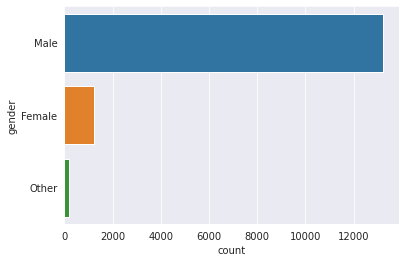

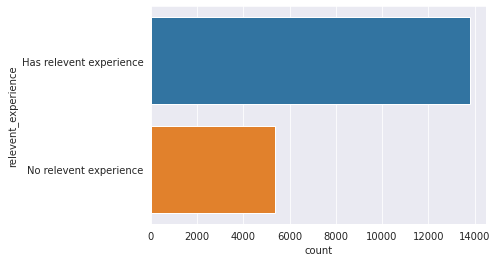

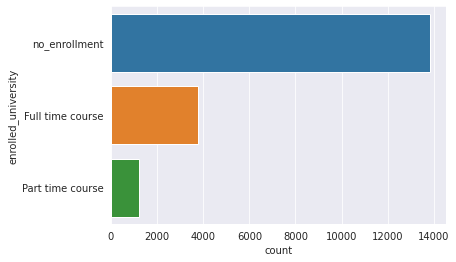

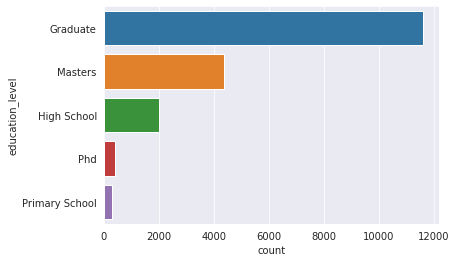

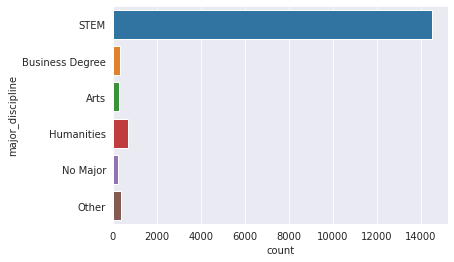

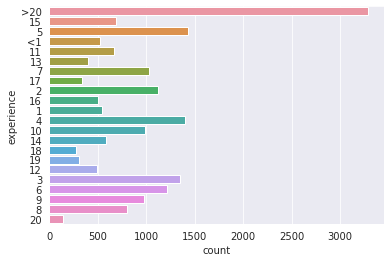

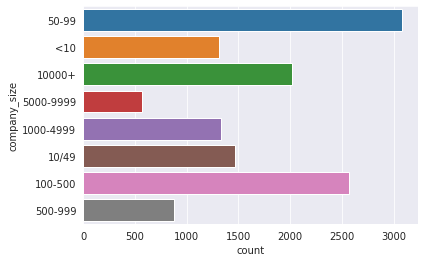

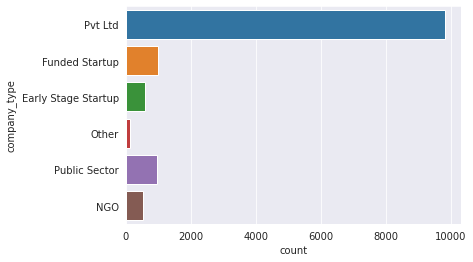

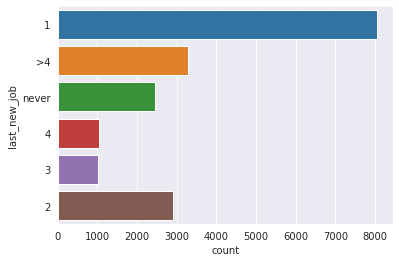

In [ ]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        sns.countplot(y=col, data=data)
        plt.show()

Agora podemos ver as distribuições de classes nos vários recursos categóricos.

### Segmentar e agrupar pelo target 

Podemos segmentar nossos dados em grupos e observar as relações entre os recursos categóricos e numéricos, principalmente em relação ao atributo classe.

## 8. Segmente o target por características numéricas

Aqui, vamos separar os dados do target e observar como os recursos numéricos são distribuídos entre aqueles que saíram (alvo = 1) e aqueles que ficaram (alvo = 0).

Usaremos o **boxplot** do Seaborn, que exibe o resumo de cinco números de um elemento numérico. Os cinco números são mínimo, primeiro quartil (Q1 ou marca de 25%), mediana (Q2), terceiro quartil (Q3 ou marca de 75%) e máximo. 

Confira [este](https://www.geeksforgeeks.org/how-to-show-mean-on-boxplot-using-seaborn-in-python/) artigo para mais informações sobre o box plot.

#### O que procurar:

* Qual classe do target é mais afetada pelos recursos numéricos

Mas antes, vamos fazer uma limpeza e converter 2 colunas categóricas em numéricas.



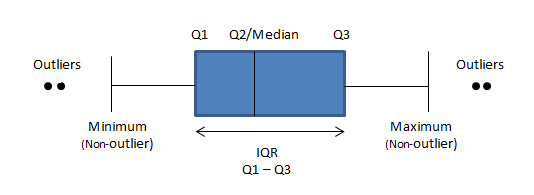

## Limpeza imediata de dados / engenharia de recursos

Vamos converter **experience** e **last_new_job** em atributos numéricos porque ambos representam os anos de experiência dos estagiários. Isso nos permitirá ver como **experience** influenciou na decisão de um estagiário de deixar ou permanecer no emprego atual. 

O código a seguir substitui alguns valores em uma coluna e converte a coluna inteira em um tipo de dados float ( int não funcionou porque as colunas possuem valores NaNs)

In [ ]:
data['experience_num'] = data['experience'].replace({'>20':'21', '<1': '0'}).astype(float)
data['last_new_job_num'] = data['last_new_job'].replace({'>4':'5','never':'0'}).astype(float)


Agora vamos criar um gráfico boxplot. 

Primeiro salvaremos as quatro colunas numéricas de interesse em uma lista chamada **num_cols**. Em seguida, percorreremos essas colunas à medida que criamos os gráfico de cada atributo em relação ao **target.**

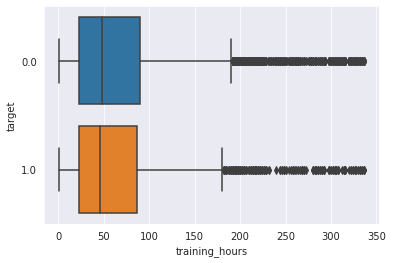

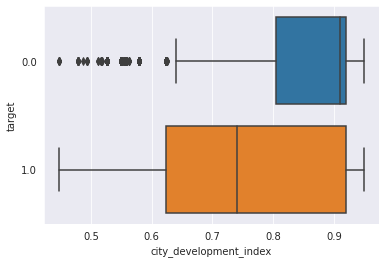

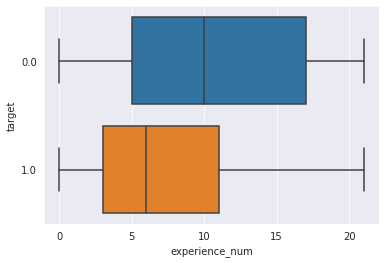

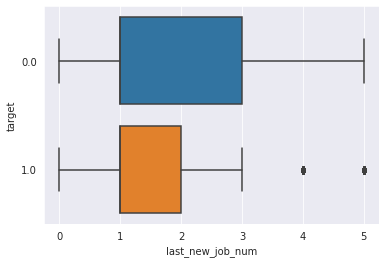

In [ ]:
num_cols = ['training_hours','city_development_index', 'experience_num', 'last_new_job_num']
for col in num_cols:
    sns.boxplot(y = data['target'].astype('category'), x = col, data=data)
    plt.show()

Podemos ver que **training_hours** estão igualmente distribuídos entre os que ficaram e os que saíram. Isso significa que **training_hours** pode não ser um bom preditor para o destino. 

No entanto, vemos que quando se trata de **experience** e **last_new_job**, uma proporção maior dos que ficaram possuem mais anos de experiência em relação aos que não ficaram e esses podem ser bons preditores.

## Recursos categóricos do segmento pelas classes de destino

Agora que vimos como o **target** se comporta com os atributos numéricos, faremos o mesmo com os atributos categóricos.

### 9. Crosstab no target 

A função **.crosstab (col1, col2)** do Panda constrói uma "tabela de tabulação cruzada" que mostra a relação entre dois recursos categóricos. A tabela mostra a frequência com que os grupos de dados dos dois atributos aparecem. Você pode incluir o parâmetro **normalize=’index’** para mostrar as porcentagens nas linhas em vez dos números reais. 

Mais informações sobre guias cruzadas [aqui](https://pbpython.com/pandas-crosstab.html) . Vamos ver isso em ação.

Vamos percorrer 3 colunas categóricas (aquelas com menos de 4 classes exclusivas) e exibir uma tabulação cruzada de seus relacionamentos com o target. A função **display()** foi usada para mostra uma tabela mais limpa do que **print()** ao executar um loop.

Obs: Usamos o crosstab porque o target aqui é um atributo numérico. Se fosse categórico, usaríamos o boxplot ou o gráfico de violino.


In [ ]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <=4:
        display(pd.crosstab(data['target'], data[col], normalize='index'))
        #display(pd.crosstab(data['target'], data[col]))

gender,Female,Male,Other
target,,,
0.0,0.080980,0.90650,0.012520
1.0,0.096222,0.88902,0.014758


relevent_experience,Has relevent experience,No relevent experience
target,,
0.0,0.753147,0.246853
1.0,0.619845,0.380155


enrolled_university,Full time course,Part time course,no_enrollment
target,,,
0.0,0.164754,0.063465,0.771781
1.0,0.307477,0.064890,0.627632


Essas tabelas mostram como os atributos categóricos são divididos entre a classe target.

### 10. Gráficos do target x atributos categóricos

Podemos traçar as relações categóricas para ter uma ideia melhor das interações. Vamos plotar um **countplot** usando a função do **Seaborn - catplot()** e o **kind=’count’** como parâmetro, pois ele seleciona o gráfico a ser plotado. Outras plotagens que você pode criar usando catplot incluem boxplot() (com kind="box"), violinplot() (com kind="violin"), boxenplot() (com kind="boxen").


#### O que procurar;

* Atributos categóricos que mudam significativamente com as classes de destino.

No código, usamos um loop para representar graficamente apenas 3 classes categóricas em relação ao target. 

Lembre-se de que **0** saiu enquanto o **1** permaneceu em seus empregos.

Observe o parâmetro **sharey=False** no catplot que desassocia as escalas y para cada classe de destino para que possamos visualizar e comparar melhor as relações.

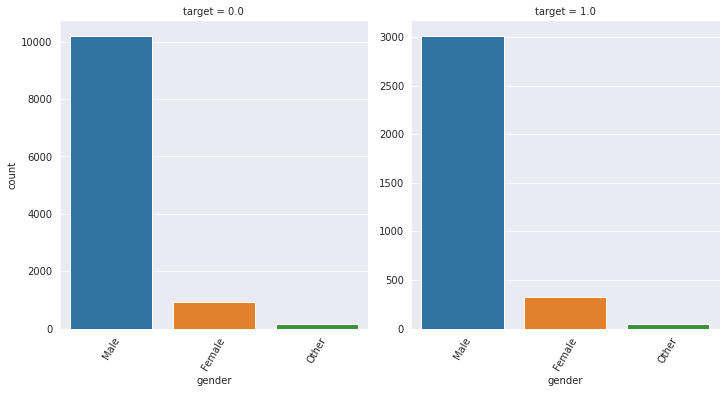

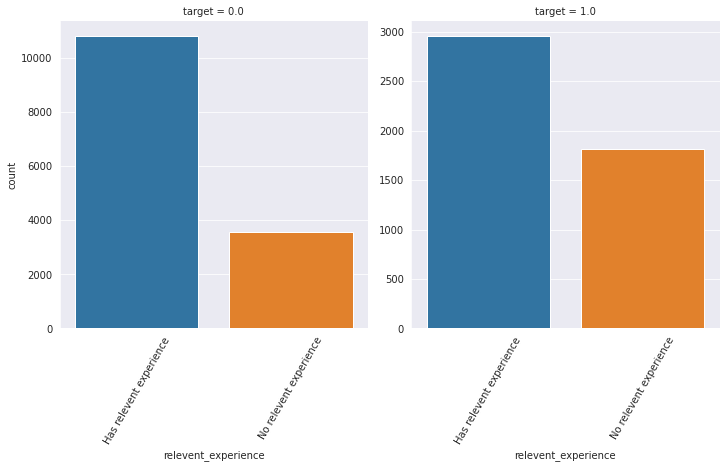

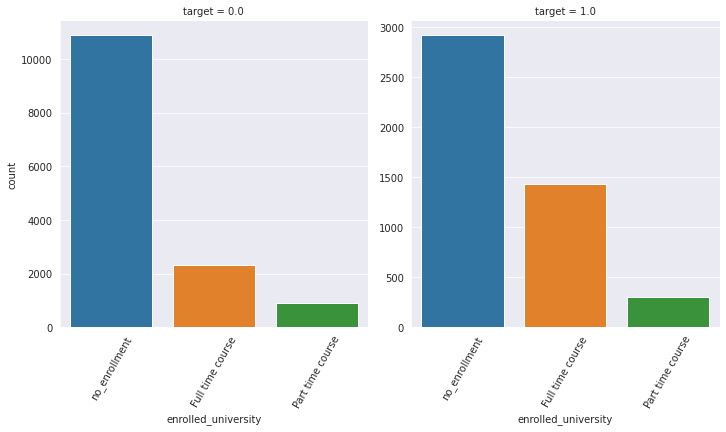

In [ ]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 4:
        g = sns.catplot(x = col, kind='count', col = 'target', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

Podemos ver que as classes de gênero não mudam muito dependendo do target, mas há uma diferença significativa quando se trata do **relevant_experience** e **enrolled_university** significando que essas categorias podem ser melhores preditores.

### 11. Agrupamento 

Agora que observamos como nosso target é distribuído pelos outros atributos de entrada, vamos verificar como as categorias estão relacionadas aos atributos numéricos.


Usaremos a função **.groupby()** do DataFrame para agrupar nossos dados em categorias e observar como os atributos numéricos são distribuídos calculando uma métrica como a **média** , **mediana** e **desvio padrão** entre as classes. A métrica que usaremos é **mean**. Também forneceremos as colunas para as quais calcular as médias.

Usando todos os atributos categóricos com classes menores ou iguais a 22


In [ ]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 3:
        display(data.groupby(col)[['training_hours', 'target', 'experience_num', 'last_new_job_num']].mean())

,training_hours,target,experience_num,last_new_job_num
gender,,,,
Female,65.636511,0.263328,9.154406,1.947240
Male,65.297633,0.227819,10.863124,2.096328
Other,63.869110,0.261780,9.079787,1.780105


,training_hours,target,experience_num,last_new_job_num
relevent_experience,,,,
Has relevent experience,65.800174,0.214690,11.537605,2.255435
No relevent experience,64.253261,0.338427,6.402806,1.330623


,training_hours,target,experience_num,last_new_job_num
enrolled_university,,,,
Full time course,64.532340,0.380889,5.763447,1.209134
Part time course,67.571786,0.252087,7.980785,1.836332
no_enrollment,65.362018,0.211406,11.548483,2.242733


## Correlação entre atributos

### 12. Matriz de correlação para os vários recursos numéricos

Uma matriz de [correlação](https://corporatefinanceinstitute.com/resources/knowledge/finance/correlation/) é uma tabela usada para a mostrar as relações entre atributos numéricos. Os mesmos atributos são mostrados nas linhas e colunas, e cada célula contém o coeficiente de correlação entre dois atributos. O coeficiente de correlação é uma medida da força da relação entre as duas variáveis ​​e pode assumir qualquer valor entre -1 e 1. A correlação de um atributo consigo mesmo é 1. 

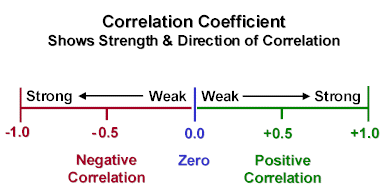

Em python, para calcular as correlações é só chamar a função **.corr()** do DataFrame para retornar os coeficientes de correlação em pares de todas as variáveis ​​numéricas no quadro de dados.

In [ ]:
corr = data.corr()
corr

,enrollee_id,city_development_index,training_hours,target,experience_num,last_new_job_num
enrollee_id,1.000000,-0.040455,0.000998,0.049475,-0.035509,-0.030693
city_development_index,-0.040455,1.000000,0.001920,-0.341665,0.333967,0.188984
training_hours,0.000998,0.001920,1.000000,-0.021577,0.000908,-0.006276
target,0.049475,-0.341665,-0.021577,1.000000,-0.176724,-0.082607
experience_num,-0.035509,0.333967,0.000908,-0.176724,1.000000,0.479033
last_new_job_num,-0.030693,0.188984,-0.006276,-0.082607,0.479033,1.000000


### 13. Mapa de calor das correlações

Um [mapa de calor](https://en.wikipedia.org/wiki/Heat_map) refere-se a uma representação codificada por cores dos dados em que os valores são representados por cores. Usaremos o [mapa de calor Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html) para visualizar os dados acima.


O código é: **sns.heatmap(corr, cmap=’RdBu_r’, annot=True, vmax=1, vmin=-1)** 

Passamos nossa matriz de correlação corr, junto com quatro outros parâmetros que são opcionais: **cmap=’RdBu_r’** que especifica a paleta de cores do mapa de calor, o vermelho-escura mostra uma forte correlação positiva e o azul-escuro mostra uma forte correlação negativa. 

Mais sobre as paletas de cores do Seaborn [aqui](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f). 
O **annot=True** inclui os valores dos coeficientes em cada célula enquanto o **vmax=1** e **vmin=-1** define os limites da barra de cores, já que nossos valores de correlação também estão no mesmo intervalo.

#### O que procurar;

* Recursos fortemente correlacionados. Estes são vermelho-escuro (forte positivo) ou azul-escuro (forte negativo).

* Fortes correlações com o target. Se alguma característica tiver uma forte correlação positiva ou negativa com ele.

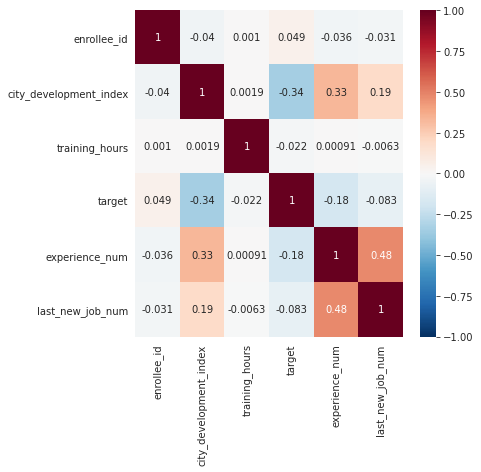

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

Vemos que **experience** e **last_new_job** tem uma correlação positiva um tanto forte. Também vemos uma relação negativa ligeiramente fraca entre o **target** e **city_development_index**.

## Fechamento

Isso conclui nossa Análise Exploratória de Dados para uma tarefa de classificação. Vimos alguns comandos para essa tarefa em um conjunto de dados de classificação de RH no Kaggle. 

Esses blocos de código, em um primeira análise, são importantes para fornecer um entendimento de nível superior do conjunto de dados e seus atributos, sem entrar muito em detalhes.

Cada conjunto de dados é único e o levará a mais códigos para entender melhor os insights, esta foi apenas uma visão geral. 

Para garantir uma análise mais minuciosa dos dados será necessário se aprofundar mais no negócio negócio (no business) da empresa.

## Referências

* https://pandas.pydata.org/
* https://seaborn.pydata.org/
* https://towardsdatascience.com/
* https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
* https://medium.com
* https://medium.com/@suemnjeri